<a href="https://colab.research.google.com/github/Commanderadi/FUTURE_DS_03/blob/main/Student_Feedback_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Feedback Analysis Report

This notebook presents an analysis of student feedback data to identify key insights and provide suggestions for improvement.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn-v0_8")

from google.colab import files
uploaded = files.upload()

Saving student_feedback.csv to student_feedback (2).csv


In [ ]:
df = pd.read_csv("student_feedback.csv")

df = df.drop(columns=["Unnamed: 0"])

aspects = [col for col in df.columns if col != "Student ID"]

df.head()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [ ]:
df[aspects].describe()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


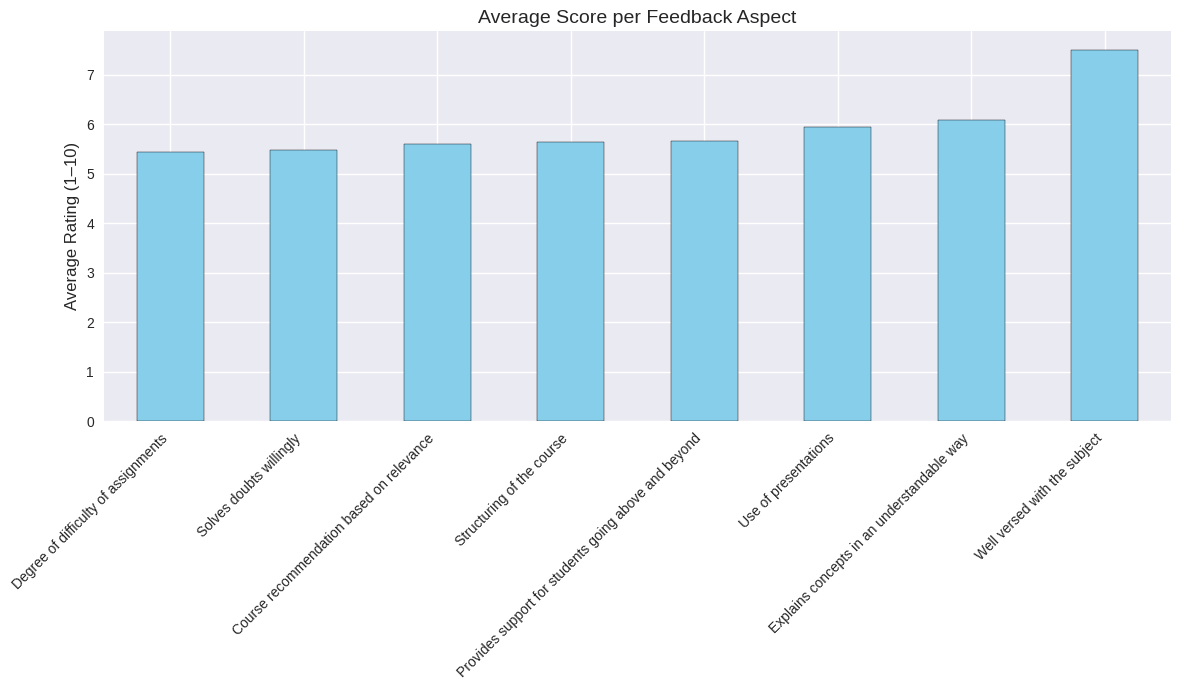

In [ ]:
avg_scores = df[aspects].mean().sort_values()

plt.figure(figsize=(12,7)) # Increased figure size
avg_scores.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Score per Feedback Aspect", fontsize=14) # Increased title font size
plt.ylabel("Average Rating (1–10)", fontsize=12) # Increased label font size
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Insights from Average Scores

*   **Observation:** The bar chart shows the average ratings (1–10) for different feedback aspects.
*   **Key Points:** "Well versed with the subject" has the highest average score, while "Degree of difficulty of assignments" and "Solves doubts willingly" have the lowest.
*   **Insight:** Students highly value the instructor's subject knowledge, but assignments and doubt-solving support are perceived as weaker areas.

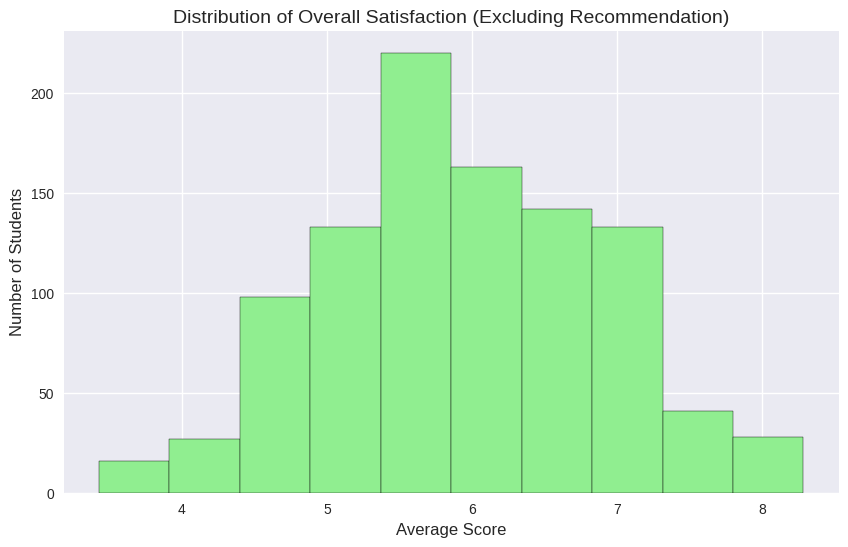

In [ ]:
df["Overall_Score_excl_rec"] = df[aspects[:-1]].mean(axis=1)

plt.figure(figsize=(10,6)) # Increased figure size
plt.hist(df["Overall_Score_excl_rec"], bins=10, edgecolor="black", color="lightgreen")
plt.title("Distribution of Overall Satisfaction (Excluding Recommendation)", fontsize=14) # Increased title font size
plt.xlabel("Average Score", fontsize=12) # Increased label font size
plt.ylabel("Number of Students", fontsize=12) # Increased label font size
plt.show()

## Insights from Overall Satisfaction Distribution

*   **Observation:** The histogram shows the distribution of overall satisfaction scores.
*   **Key Points:** Most scores are concentrated between 5.5 and 6.5, indicating moderate satisfaction.
*   **Insight:** The majority of students are moderately satisfied, with fewer students being extremely satisfied or dissatisfied.

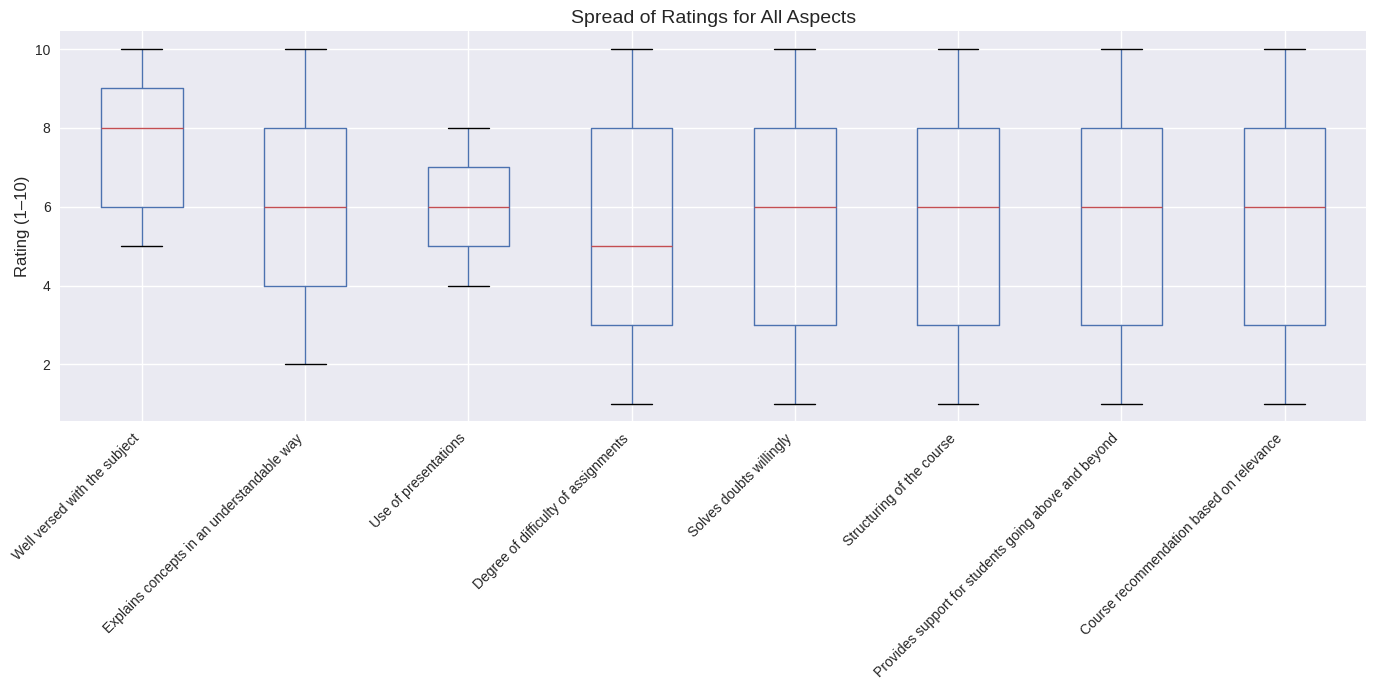

In [ ]:
plt.figure(figsize=(14,7)) # Increased figure size
df[aspects].boxplot()
plt.title("Spread of Ratings for All Aspects", fontsize=14) # Increased title font size
plt.ylabel("Rating (1–10)", fontsize=12) # Increased label font size
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Insights from Spread of Ratings (Boxplots)

*   **Observation:** The boxplot shows the spread of ratings for all aspects.
*   **Key Points:** "Well versed with the subject" has a smaller spread, indicating more consistent high ratings. Other aspects have wider spreads, showing more variation in student opinions.
*   **Insight:** While there is strong agreement on subject knowledge, perceptions of other aspects like teaching methods and support vary more widely among students.

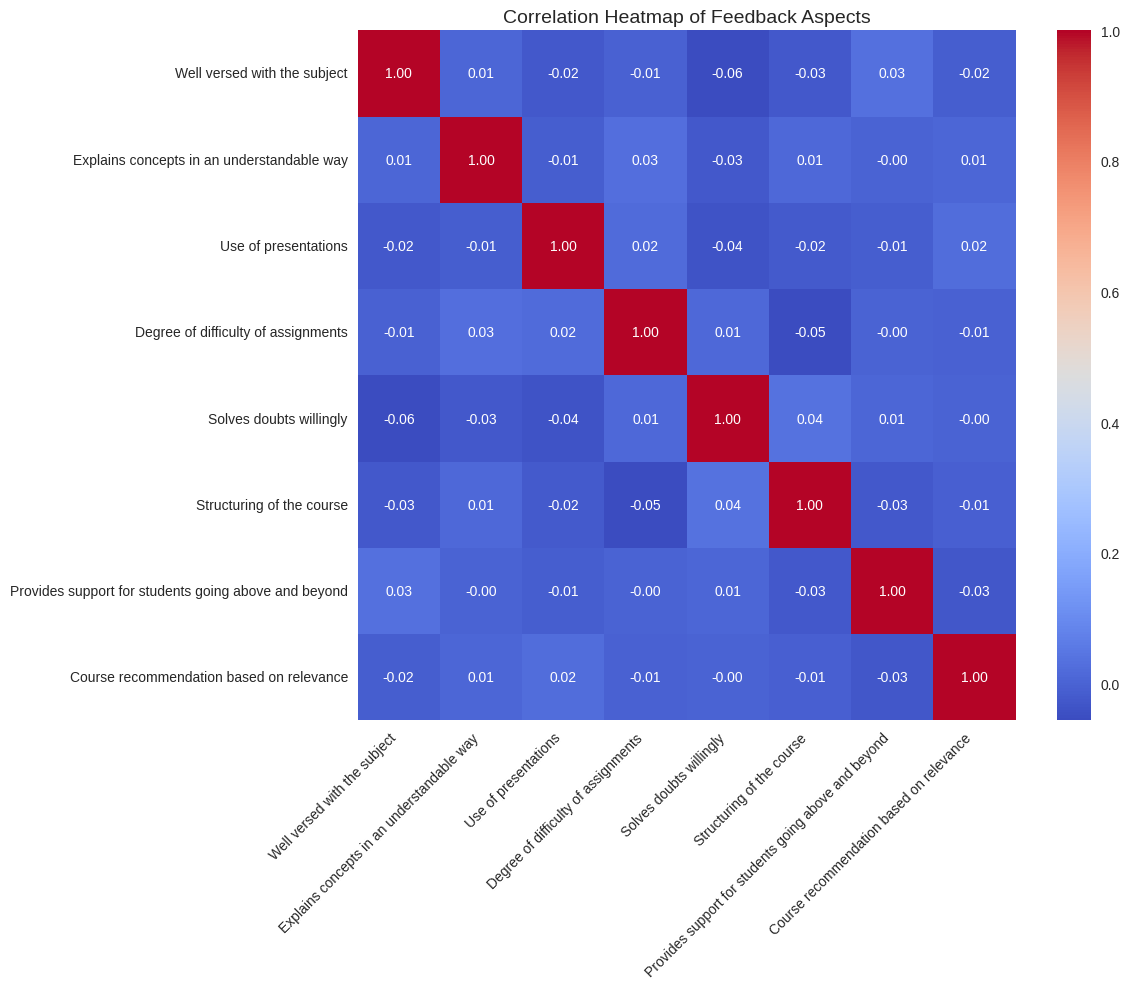

In [ ]:
corr = df[aspects].corr()

plt.figure(figsize=(12,10)) # Increased figure size
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10}) # Adjusted annotation font size
plt.title("Correlation Heatmap of Feedback Aspects", fontsize=14) # Increased title font size
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment
plt.yticks(fontsize=10) # Adjusted font size
plt.tight_layout() # Adjust layout
plt.show()

## Insights from Correlation Heatmap

*   **Observation:** The heatmap shows the correlations between different feedback aspects.
*   **Key Points:** All correlation coefficients are very low (close to 0).
*   **Insight:** There is little to no linear relationship between different feedback aspects, suggesting students judge each aspect independently.

In [ ]:
top_satisfied_entries = df.nlargest(3, 'Overall_Score_excl_rec')

print("Top 3 entries with the highest overall satisfaction scores:")
display(top_satisfied_entries)

Top 3 entries with the highest overall satisfaction scores:


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Score_excl_rec
701,951,10,10,7,10,5,9,7,1,8.285714
103,671,9,8,6,10,10,7,7,8,8.142857
169,164,8,5,7,10,8,9,10,1,8.142857


## Key Recommendations for Event Organizers

Based on the analysis, here are some key recommendations:

*   **Leverage Instructor's Subject Knowledge:** Continue to highlight the instructor's expertise as it is highly valued by students.
*   **Improve Assignment Design and Support:** Review the difficulty and clarity of assignments and enhance the support provided for doubt-solving. Consider offering more resources or alternative approaches to cater to diverse learning needs.
*   **Address Varied Perceptions of Teaching Methods:** Explore different teaching and presentation styles to better engage all students. Gathering more specific feedback on what works well and what doesn't can be helpful.
*   **Focus on Targeted Improvements:** Since feedback aspects are independent, focus improvement efforts on specific areas identified as weaker rather than expecting improvements in one area to automatically impact others.
*   **Gather More Detailed Feedback:** Implement open-ended questions in future feedback forms to collect qualitative data that can provide deeper insights into the reasons behind student ratings.

In [ ]:
# Example of how to export the DataFrame to a CSV file
df.to_csv('student_feedback_analyzed.csv', index=False)